# Data preprocessing (Notebook 2/5)

This notebook contains, 
- data clean-up such as removing html elements, removing punctuation and handling the case
- data pre-processing such as tokenization, stemming and lemmatisation

Next notebook: `issue-7-as-sentimental-baseline-model.ipynb`

In [2]:
import pandas as pd
from string import punctuation # for preprocessing
from nltk.tokenize.casual import casual_tokenize # for tokenization
from nltk.stem.porter import PorterStemmer # for stemming
from nltk.stem import WordNetLemmatizer
pd.set_option('display.max_colwidth', None)
from src.nlp_preprocessing import clean_html_column
from src.nlp_preprocessing import get_lemmas

In [ ]:
# run them if you face any errors

# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [10]:
# source: issue-3-as-dataset-creation.ipynb
df = pd.read_csv('../data/small_sample.csv')

In [11]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,1.0,True,"12 12, 2017",A20AKRG3V2B372,B00RN08584,"{'Color:': ' Black', 'Style:': ' Printer'}",MOMTO3BOYS,miserable set up. made me want to put my fist in the wall. wish i could return this.,stay away,1513036800,NaN,NaN
1,1.0,False,"08 27, 2009",A7FWSCI4QP3J4,B001VEJ23A,NaN,J. Hurley,"The only thing you are paying for is the Dell name. This printer is overpriced. I do like the convenience of it being wireless but that is it. I get error messages all the time, so I have to unplug it, restart my computer. So a two minute print job turns into two hours. USES INK!!!!! I replaced my cartridge yesterday and printed about 15 pages for my son and had to replace it today. DONT BUY. I am thinking of getting the Kodak ESP 7 with the ink saving offer. Right now I am stuck with this one till I can afford another",Buyer Beware: This will clean out your bank account!!!,1251331200,8.0,NaN
2,1.0,True,"03 27, 2015",A1LWZUTY6B5DWS,B0006VQBTW,NaN,Hazel Smith,Most of these markers dried out within the first two weeks. Not a good deal.,Dried out very quickly,1427414400,NaN,NaN
3,1.0,True,"07 6, 2017",A3E1IXJ949VL29,B007ADJQBE,"{'Size:': ' 46 x 60 Inches', 'Style:': ' Rectangle'}",JCR,Only measures 58x46 instead of 60x46. I see a few other reviewers have noted the same. They shouldn't advertise something that isn't true.,Smaller than advertised.,1499299200,2.0,NaN
4,1.0,False,"06 9, 2011",A3H7NPNDMGLOU4,B006K0OCUI,"{'Size:': ' 2-Count', 'Color:': ' Black'}",OK,"I'll agree the ink itself is exceptionally smooth, but there seems to be a problem with the ball bearing tip.\n\nPerhaps it's due to the extreme angle at which I tend to hold my pen and the rhythm of my stroke, but these pens simply made a mess when I tried to write with them. The ink is ""slippery"" and actually globbed in puddles as I wrote; the output was equally bad, whether writing in cursive or printing in block letters.\n\nJudging from the many other positive reviews here, I suspect it could be the shallowness of my writing angle. Perhaps, if you hold your pen upright, this would not be an issue. But for my writing style, these are a no-go--the finished notes are sloppy and unusable. No point in writing what you can't read later!",I Wanted to Like This Pen,1307577600,NaN,NaN


# Cleaning up review
Here we are going to create a new column containing the cleaned up version of reviews, we are going to perform the following preprocessing right now
- Creating a new column
- Removing punctuations
- Removing HTML elements like `<br>`
- Converting to lowercase

In [12]:
# retrieving the updated dataframe without html tags
df = clean_html_column(df,'reviewText', 'cleaned_review')
df[['reviewText','cleaned_review']].head()

,reviewText,cleaned_review
0,miserable set up. made me want to put my fist in the wall. wish i could return this.,miserable set up. made me want to put my fist in the wall. wish i could return this.
1,"The only thing you are paying for is the Dell name. This printer is overpriced. I do like the convenience of it being wireless but that is it. I get error messages all the time, so I have to unplug it, restart my computer. So a two minute print job turns into two hours. USES INK!!!!! I replaced my cartridge yesterday and printed about 15 pages for my son and had to replace it today. DONT BUY. I am thinking of getting the Kodak ESP 7 with the ink saving offer. Right now I am stuck with this one till I can afford another","The only thing you are paying for is the Dell name. This printer is overpriced. I do like the convenience of it being wireless but that is it. I get error messages all the time, so I have to unplug it, restart my computer. So a two minute print job turns into two hours. USES INK!!!!! I replaced my cartridge yesterday and printed about 15 pages for my son and had to replace it today. DONT BUY. I am thinking of getting the Kodak ESP 7 with the ink saving offer. Right now I am stuck with this one till I can afford another"
2,Most of these markers dried out within the first two weeks. Not a good deal.,Most of these markers dried out within the first two weeks. Not a good deal.
3,Only measures 58x46 instead of 60x46. I see a few other reviewers have noted the same. They shouldn't advertise something that isn't true.,Only measures 58x46 instead of 60x46. I see a few other reviewers have noted the same. They shouldn't advertise something that isn't true.
4,"I'll agree the ink itself is exceptionally smooth, but there seems to be a problem with the ball bearing tip.\n\nPerhaps it's due to the extreme angle at which I tend to hold my pen and the rhythm of my stroke, but these pens simply made a mess when I tried to write with them. The ink is ""slippery"" and actually globbed in puddles as I wrote; the output was equally bad, whether writing in cursive or printing in block letters.\n\nJudging from the many other positive reviews here, I suspect it could be the shallowness of my writing angle. Perhaps, if you hold your pen upright, this would not be an issue. But for my writing style, these are a no-go--the finished notes are sloppy and unusable. No point in writing what you can't read later!","I'll agree the ink itself is exceptionally smooth, but there seems to be a problem with the ball bearing tip.\n\nPerhaps it's due to the extreme angle at which I tend to hold my pen and the rhythm of my stroke, but these pens simply made a mess when I tried to write with them. The ink is ""slippery"" and actually globbed in puddles as I wrote; the output was equally bad, whether writing in cursive or printing in block letters.\n\nJudging from the many other positive reviews here, I suspect it could be the shallowness of my writing angle. Perhaps, if you hold your pen upright, this would not be an issue. But for my writing style, these are a no-go--the finished notes are sloppy and unusable. No point in writing what you can't read later!"


In [13]:
# removing punctuation and turning into lower case 
df['cleaned_review'] = df['cleaned_review'].apply(lambda review: str(review)\
                                            .translate(str.maketrans('','',punctuation))\
                                            .lower())
df[['reviewText','cleaned_review']].head()

,reviewText,cleaned_review
0,miserable set up. made me want to put my fist in the wall. wish i could return this.,miserable set up made me want to put my fist in the wall wish i could return this
1,"The only thing you are paying for is the Dell name. This printer is overpriced. I do like the convenience of it being wireless but that is it. I get error messages all the time, so I have to unplug it, restart my computer. So a two minute print job turns into two hours. USES INK!!!!! I replaced my cartridge yesterday and printed about 15 pages for my son and had to replace it today. DONT BUY. I am thinking of getting the Kodak ESP 7 with the ink saving offer. Right now I am stuck with this one till I can afford another",the only thing you are paying for is the dell name this printer is overpriced i do like the convenience of it being wireless but that is it i get error messages all the time so i have to unplug it restart my computer so a two minute print job turns into two hours uses ink i replaced my cartridge yesterday and printed about 15 pages for my son and had to replace it today dont buy i am thinking of getting the kodak esp 7 with the ink saving offer right now i am stuck with this one till i can afford another
2,Most of these markers dried out within the first two weeks. Not a good deal.,most of these markers dried out within the first two weeks not a good deal
3,Only measures 58x46 instead of 60x46. I see a few other reviewers have noted the same. They shouldn't advertise something that isn't true.,only measures 58x46 instead of 60x46 i see a few other reviewers have noted the same they shouldnt advertise something that isnt true
4,"I'll agree the ink itself is exceptionally smooth, but there seems to be a problem with the ball bearing tip.\n\nPerhaps it's due to the extreme angle at which I tend to hold my pen and the rhythm of my stroke, but these pens simply made a mess when I tried to write with them. The ink is ""slippery"" and actually globbed in puddles as I wrote; the output was equally bad, whether writing in cursive or printing in block letters.\n\nJudging from the many other positive reviews here, I suspect it could be the shallowness of my writing angle. Perhaps, if you hold your pen upright, this would not be an issue. But for my writing style, these are a no-go--the finished notes are sloppy and unusable. No point in writing what you can't read later!",ill agree the ink itself is exceptionally smooth but there seems to be a problem with the ball bearing tip\n\nperhaps its due to the extreme angle at which i tend to hold my pen and the rhythm of my stroke but these pens simply made a mess when i tried to write with them the ink is slippery and actually globbed in puddles as i wrote the output was equally bad whether writing in cursive or printing in block letters\n\njudging from the many other positive reviews here i suspect it could be the shallowness of my writing angle perhaps if you hold your pen upright this would not be an issue but for my writing style these are a nogothe finished notes are sloppy and unusable no point in writing what you cant read later


# Tokenization
Tokenization is the process of breaking down a text document into smaller units called tokens. These tokens can be words, subwords, or characters, depending on the level of granularity required for the analysis.
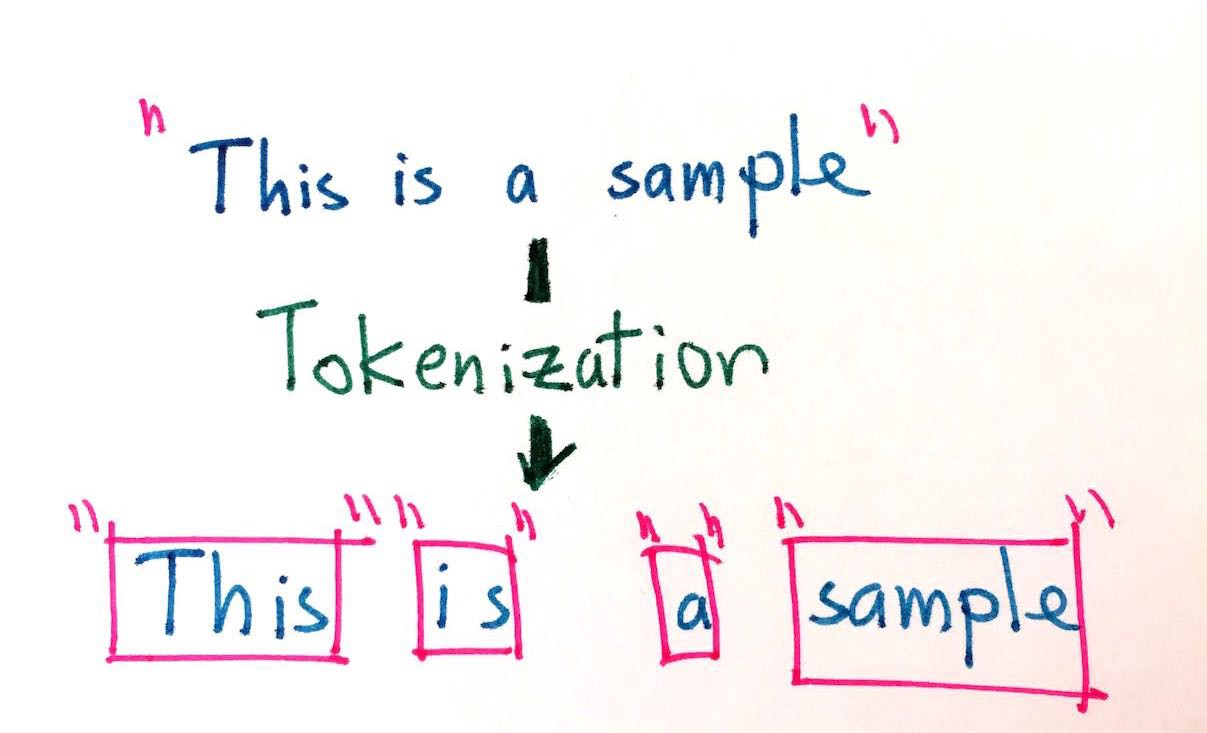

In [14]:
df['tokens'] = df['cleaned_review'].apply(lambda review:
                            casual_tokenize(str(review)))
df[['cleaned_review','tokens']].head()

,cleaned_review,tokens
0,miserable set up made me want to put my fist in the wall wish i could return this,"[miserable, set, up, made, me, want, to, put, my, fist, in, the, wall, wish, i, could, return, this]"
1,the only thing you are paying for is the dell name this printer is overpriced i do like the convenience of it being wireless but that is it i get error messages all the time so i have to unplug it restart my computer so a two minute print job turns into two hours uses ink i replaced my cartridge yesterday and printed about 15 pages for my son and had to replace it today dont buy i am thinking of getting the kodak esp 7 with the ink saving offer right now i am stuck with this one till i can afford another,"[the, only, thing, you, are, paying, for, is, the, dell, name, this, printer, is, overpriced, i, do, like, the, convenience, of, it, being, wireless, but, that, is, it, i, get, error, messages, all, the, time, so, i, have, to, unplug, it, restart, my, computer, so, a, two, minute, print, job, turns, into, two, hours, uses, ink, i, replaced, my, cartridge, yesterday, and, printed, about, 15, pages, for, my, son, and, had, to, replace, it, today, dont, buy, i, am, thinking, of, getting, the, kodak, esp, 7, with, the, ink, saving, offer, right, now, i, am, stuck, with, this, one, till, ...]"
2,most of these markers dried out within the first two weeks not a good deal,"[most, of, these, markers, dried, out, within, the, first, two, weeks, not, a, good, deal]"
3,only measures 58x46 instead of 60x46 i see a few other reviewers have noted the same they shouldnt advertise something that isnt true,"[only, measures, 58x46, instead, of, 60x46, i, see, a, few, other, reviewers, have, noted, the, same, they, shouldnt, advertise, something, that, isnt, true]"
4,ill agree the ink itself is exceptionally smooth but there seems to be a problem with the ball bearing tip\n\nperhaps its due to the extreme angle at which i tend to hold my pen and the rhythm of my stroke but these pens simply made a mess when i tried to write with them the ink is slippery and actually globbed in puddles as i wrote the output was equally bad whether writing in cursive or printing in block letters\n\njudging from the many other positive reviews here i suspect it could be the shallowness of my writing angle perhaps if you hold your pen upright this would not be an issue but for my writing style these are a nogothe finished notes are sloppy and unusable no point in writing what you cant read later,"[ill, agree, the, ink, itself, is, exceptionally, smooth, but, there, seems, to, be, a, problem, with, the, ball, bearing, tip, perhaps, its, due, to, the, extreme, angle, at, which, i, tend, to, hold, my, pen, and, the, rhythm, of, my, stroke, but, these, pens, simply, made, a, mess, when, i, tried, to, write, with, them, the, ink, is, slippery, and, actually, globbed, in, puddles, as, i, wrote, the, output, was, equally, bad, whether, writing, in, cursive, or, printing, in, block, letters, judging, from, the, many, other, positive, reviews, here, i, suspect, it, could, be, the, shallowness, of, my, writing, angle, ...]"


# Stemming
Stemming in NLP is the process of reducing words to their base form by removing prefixes and suffixes. It helps in treating different forms of words as the same, aiding in tasks like text analysis and retrieval.

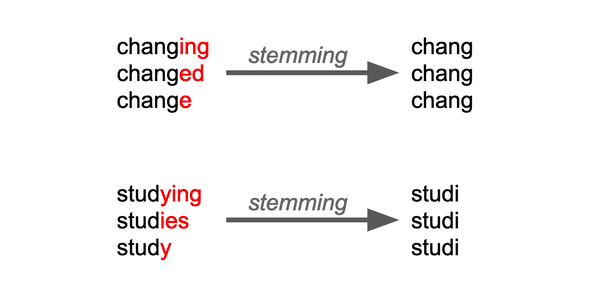


In [15]:
# creating a stemmer object
stemmer = PorterStemmer()

In [16]:
# performing stemming on the tokens
df['stemmed_tokens'] = df['tokens'].apply(lambda words: 
                [stemmer.stem(word) for word in words])
df[['tokens','stemmed_tokens']].head()

,tokens,stemmed_tokens
0,"[miserable, set, up, made, me, want, to, put, my, fist, in, the, wall, wish, i, could, return, this]","[miser, set, up, made, me, want, to, put, my, fist, in, the, wall, wish, i, could, return, thi]"
1,"[the, only, thing, you, are, paying, for, is, the, dell, name, this, printer, is, overpriced, i, do, like, the, convenience, of, it, being, wireless, but, that, is, it, i, get, error, messages, all, the, time, so, i, have, to, unplug, it, restart, my, computer, so, a, two, minute, print, job, turns, into, two, hours, uses, ink, i, replaced, my, cartridge, yesterday, and, printed, about, 15, pages, for, my, son, and, had, to, replace, it, today, dont, buy, i, am, thinking, of, getting, the, kodak, esp, 7, with, the, ink, saving, offer, right, now, i, am, stuck, with, this, one, till, ...]","[the, onli, thing, you, are, pay, for, is, the, dell, name, thi, printer, is, overpr, i, do, like, the, conveni, of, it, be, wireless, but, that, is, it, i, get, error, messag, all, the, time, so, i, have, to, unplug, it, restart, my, comput, so, a, two, minut, print, job, turn, into, two, hour, use, ink, i, replac, my, cartridg, yesterday, and, print, about, 15, page, for, my, son, and, had, to, replac, it, today, dont, buy, i, am, think, of, get, the, kodak, esp, 7, with, the, ink, save, offer, right, now, i, am, stuck, with, thi, one, till, ...]"
2,"[most, of, these, markers, dried, out, within, the, first, two, weeks, not, a, good, deal]","[most, of, these, marker, dri, out, within, the, first, two, week, not, a, good, deal]"
3,"[only, measures, 58x46, instead, of, 60x46, i, see, a, few, other, reviewers, have, noted, the, same, they, shouldnt, advertise, something, that, isnt, true]","[onli, measur, 58x46, instead, of, 60x46, i, see, a, few, other, review, have, note, the, same, they, shouldnt, advertis, someth, that, isnt, true]"
4,"[ill, agree, the, ink, itself, is, exceptionally, smooth, but, there, seems, to, be, a, problem, with, the, ball, bearing, tip, perhaps, its, due, to, the, extreme, angle, at, which, i, tend, to, hold, my, pen, and, the, rhythm, of, my, stroke, but, these, pens, simply, made, a, mess, when, i, tried, to, write, with, them, the, ink, is, slippery, and, actually, globbed, in, puddles, as, i, wrote, the, output, was, equally, bad, whether, writing, in, cursive, or, printing, in, block, letters, judging, from, the, many, other, positive, reviews, here, i, suspect, it, could, be, the, shallowness, of, my, writing, angle, ...]","[ill, agre, the, ink, itself, is, except, smooth, but, there, seem, to, be, a, problem, with, the, ball, bear, tip, perhap, it, due, to, the, extrem, angl, at, which, i, tend, to, hold, my, pen, and, the, rhythm, of, my, stroke, but, these, pen, simpli, made, a, mess, when, i, tri, to, write, with, them, the, ink, is, slipperi, and, actual, glob, in, puddl, as, i, wrote, the, output, wa, equal, bad, whether, write, in, cursiv, or, print, in, block, letter, judg, from, the, mani, other, posit, review, here, i, suspect, it, could, be, the, shallow, of, my, write, angl, ...]"


# Lemmatisation
Lemmatization in natural language processing (NLP) is the process of reducing words to their base or dictionary form, known as the lemma. 
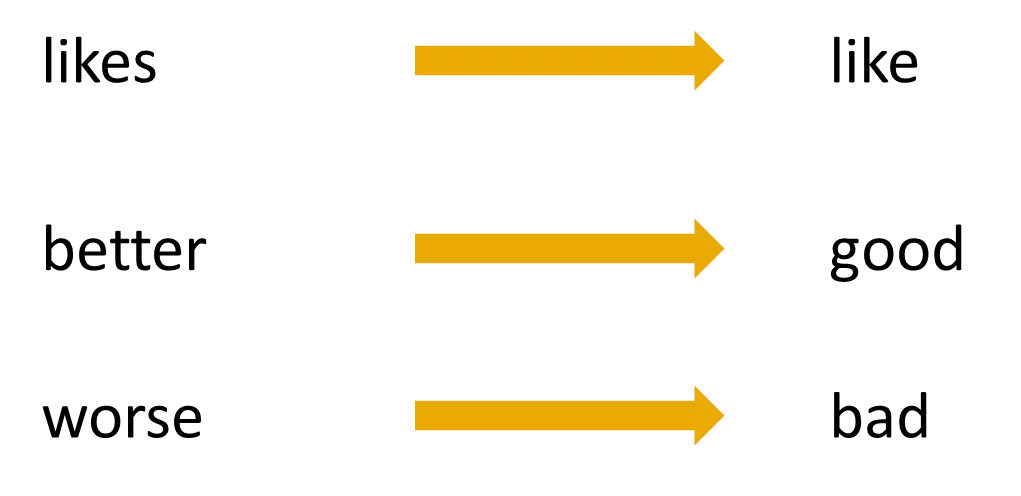

In [17]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
df['lemmas'] = df['tokens'].apply(lambda tokens: get_lemmas(tokens))
# df[['cleaned_review','cleaned_review','lemmas']].sample(3)

In [19]:
df[['cleaned_review','stemmed_tokens','lemmas']].sample(3)

,cleaned_review,stemmed_tokens,lemmas
2473,bought 2 within 2 days of each other everything worked great super fast printing on photos then the 1st one bought on 51314 had paper feeding problems i cleaned everything but the problem would not go away then the second one quit bought 51514 both will not accept paper feed i keep getting and out of paper error when its full it will only take paper i physically push in when the feeder is spinning i bought wifi wireless so i could print anywhere in the house now i have to stand over them not good because my business is photos now the first one is having ink troubles the pictures have streaks most of the time i just bought ink 3 boxes of ink and now i will probably have to buy new printers it wont be canon,"[bought, 2, within, 2, day, of, each, other, everyth, work, great, super, fast, print, on, photo, then, the, 1st, one, bought, on, 51314, had, paper, feed, problem, i, clean, everyth, but, the, problem, would, not, go, away, then, the, second, one, quit, bought, 51514, both, will, not, accept, paper, feed, i, keep, get, and, out, of, paper, error, when, it, full, it, will, onli, take, paper, i, physic, push, in, when, the, feeder, is, spin, i, bought, wifi, wireless, so, i, could, print, anywher, in, the, hous, now, i, have, to, stand, over, them, not, good, becaus, my, busi, is, ...]","[bought, day, other, everything, work, great, super, fast, printing, photo, then, bought, have, paper, feed, problem, i, clean, everything, problem, not, go, away, then, second, quit, bought, not, accept, paper, feed, i, keep, get, paper, error, full, only, take, paper, i, physically, push, feeder, be, spin, i, bought, wifi, wireless, so, i, print, anywhere, house, now, i, have, stand, not, good, business, be, photo, now, first, be, have, ink, trouble, picture, have, streak, most, time, i, just, bought, ink, box, ink, now, i, probably, have, buy, new, printer, wont, be, canon]"
2157,stopped working after a couple of uses would not recommend purchasing,"[stop, work, after, a, coupl, of, use, would, not, recommend, purchas]","[stop, work, couple, us, not, recommend, purchasing]"
4686,update now that ive been using them for a while i actually dont recommend the fluorescent highlighters they are really dark and dont erase easily however the lighter i think they are called pastel ones are awesome i still give them 3 stars because i love this companys products and everything else i have of theirs is awesome\n\ni havent been using these for long but so far i love them great for use in my planner,"[updat, now, that, ive, been, use, them, for, a, while, i, actual, dont, recommend, the, fluoresc, highlight, they, are, realli, dark, and, dont, eras, easili, howev, the, lighter, i, think, they, are, call, pastel, one, are, awesom, i, still, give, them, 3, star, becaus, i, love, thi, compani, product, and, everyth, els, i, have, of, their, is, awesom, i, havent, been, use, these, for, long, but, so, far, i, love, them, great, for, use, in, my, planner]","[update, now, ive, be, use, i, actually, dont, recommend, fluorescent, highlighter, be, really, dark, dont, erase, easily, however, lighter, i, think, be, call, pastel, one, be, awesome, i, still, give, star, i, love, company, product, everything, else, i, have, theirs, be, awesome, i, havent, be, use, long, so, far, i, love, great, use, planner]"


In [16]:
df.to_csv('../data/preprocessed_small_sample.csv', index=False)